# Fast Food Marketing A/B Test

Evaluate A/B testing results and decide which marketing strategy works the best.

## About the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# df = pd.read_csv('./dataset/WA_Marketing-Campaign.csv')
df = pd.read_csv("/kaggle/input/fast-food-marketing-campaign-ab-test/WA_Marketing-Campaign.csv")
df

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


In [3]:
df.describe(include='all')

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548,548.000000,548.000000,548.000000,548.000000,548.000000
unique,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Medium,NaN,NaN,NaN,NaN,NaN
freq,NaN,320,NaN,NaN,NaN,NaN,NaN
mean,5.715328,NaN,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,NaN,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,NaN,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,NaN,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,NaN,708.000000,12.000000,3.000000,3.250000,60.477500


Column explanation:
- MarketID: unique identifier for market
- MarketSize: size of market area by sales
- LocationID: unique identifier for store location
- AgeOfStore: age of store in years
- Promotion: one of three promotions that were tested
- week: one of four weeks when the promotions were run
- SalesInThousands: sales amount for a specific LocationID, Promotion, and week

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


## Exploratory Data Analysis

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

### Data Insight

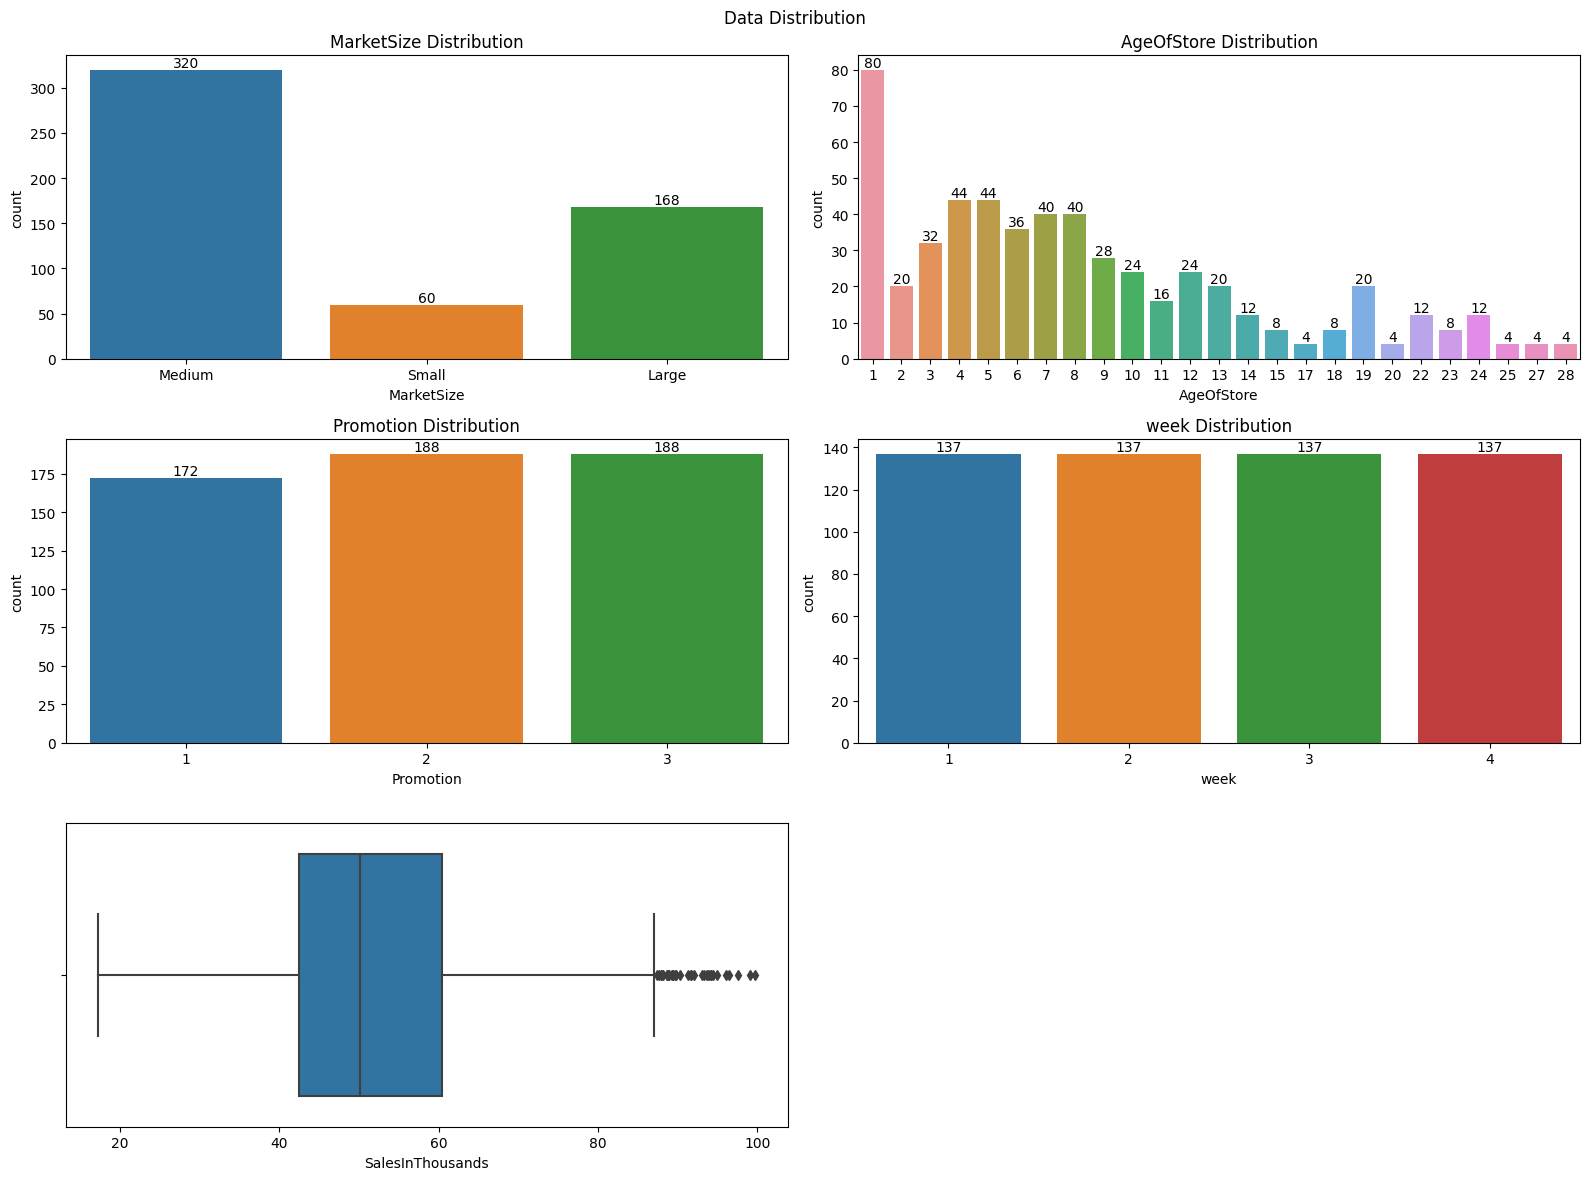

In [6]:
f, ax = plt.subplots(3,2, figsize=(16,12))
cols = ['MarketSize','AgeOfStore','Promotion','week']
c = 0
for i in range(len(ax)-1):
    j = 0
    while j<2:
        ax[i,j] = sns.countplot(df,x=cols[c], ax=ax[i,j])
        ax[i,j].bar_label(ax[i,j].containers[0])
        ax[i,j].set_title(cols[c]+' Distribution')
        j+=1
        c+=1

sns.boxplot(df,x='SalesInThousands', ax=ax[2,0])
ax[2,1].set_axis_off()
plt.suptitle('Data Distribution')
plt.tight_layout()
plt.show()

### Extreme Value Checking

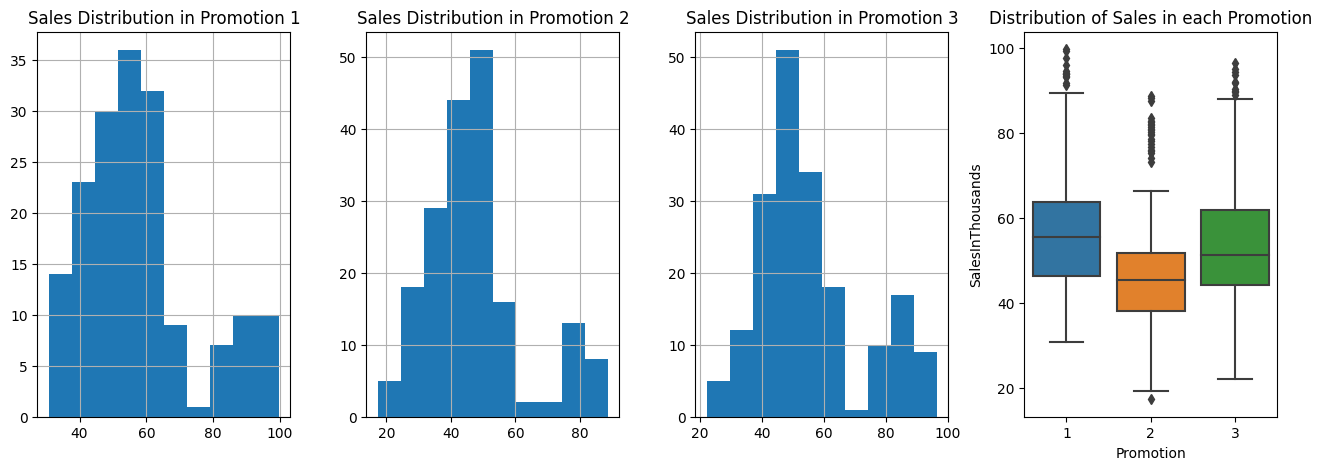

In [7]:
f, ax = plt.subplots(1,4, figsize=(16,5))
df[df.Promotion == 1].hist('SalesInThousands', ax=ax[0])
ax[0].set_title('Sales Distribution in Promotion 1')
df[df.Promotion == 2].hist('SalesInThousands', ax=ax[1])
ax[1].set_title('Sales Distribution in Promotion 2')
df[df.Promotion == 3].hist('SalesInThousands', ax=ax[2])
ax[2].set_title('Sales Distribution in Promotion 3')
sns.boxplot(x=df.Promotion, y=df.SalesInThousands, ax=ax[3])
ax[3].set_title('Distribution of Sales in each Promotion')
plt.show()

In [8]:
df.groupby('Promotion')["SalesInThousands"].describe()

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,58.099012,16.553782,30.81,46.3525,55.385,63.6175,99.65
2,188.0,47.329415,15.108955,17.34,38.1700,45.385,51.7450,88.64
3,188.0,55.364468,16.766231,22.18,44.1975,51.165,61.7325,96.48


Although there is some extreme values, but it's not that significant in each promotion group. Therefore, we can leave it as now.

### Brief Problem

### Q1: How is the distribution of market and location in each promotion type?


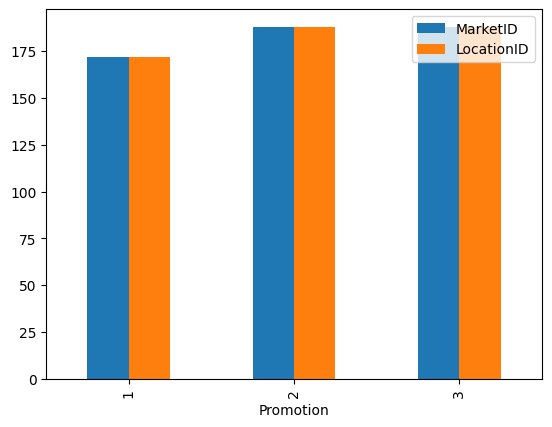

In [9]:
tmp = df.groupby(['Promotion']).agg({'MarketID':'count','LocationID':'count'})
tmp.plot(kind='bar')
plt.show()

Based on result above, market and location in each promotion is distributed roughly equaly

In [10]:
tmp

,MarketID,LocationID
Promotion,,
1,172,172
2,188,188
3,188,188


### Q2: How is the revenue each promotion group in each week?

In [11]:
tmp = df.groupby(['week','Promotion'])['SalesInThousands'].agg(['count','mean','median','sum']).reset_index(level=1)
tmp

,Promotion,count,mean,median,sum
week,,,,,
1,1,43,58.244419,53.79,2504.51
1,2,47,47.730213,46.02,2243.32
1,3,47,55.776170,51.01,2621.48
2,1,43,56.929535,55.11,2447.97
2,2,47,47.582553,45.75,2236.38
2,3,47,55.949149,53.47,2629.61
3,1,43,58.774884,56.19,2527.32
3,2,47,47.722128,45.35,2242.94
3,3,47,54.377872,50.55,2555.76


As we can see above, each promotion have different result in revenue with Promotion 1 overall getting the highest avg and median of revenue. While Promotion 3 have higher total revenue in general. Is the differences significant? We will check more about this later

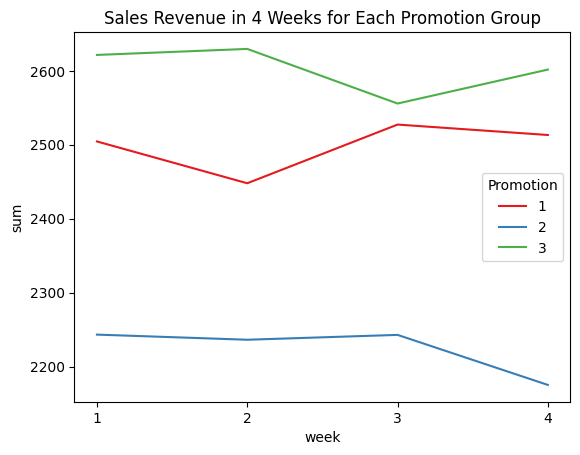

In [12]:
ax = sns.lineplot(x=tmp.index ,y=tmp['sum'] ,hue=tmp['Promotion'], errorbar=None, palette='Set1')
ax.set_xticks([1,2,3,4])
ax.set_title('Sales Revenue in 4 Weeks for Each Promotion Group')
plt.show()

Some point taken from result above:
- Promotion 3 sales revenue drop at week 3, but it increase again a week after
- Promotion 1 revenue drop at week 2, it got increase at week 3, but at week 4 the revenue slightly drop
- Promotion 2 almost have no impact in sales revenue up to week 3, and it decreasing at week 4

It need additional context to learn the cause of revenue drop in certain week for each Promotion group. 

### Q3: What kind of location that have high revenue? 

First, let's check shop revenue by market size

In [13]:
tmp = df.groupby(['week','Promotion','MarketSize']).agg({'SalesInThousands':['count','sum','mean','median']}).reset_index(level=[1,2])
# tmp

In [14]:
# df.groupby(['Promotion','MarketSize']).agg({'MarketSize':'count','SalesInThousands':'count'})

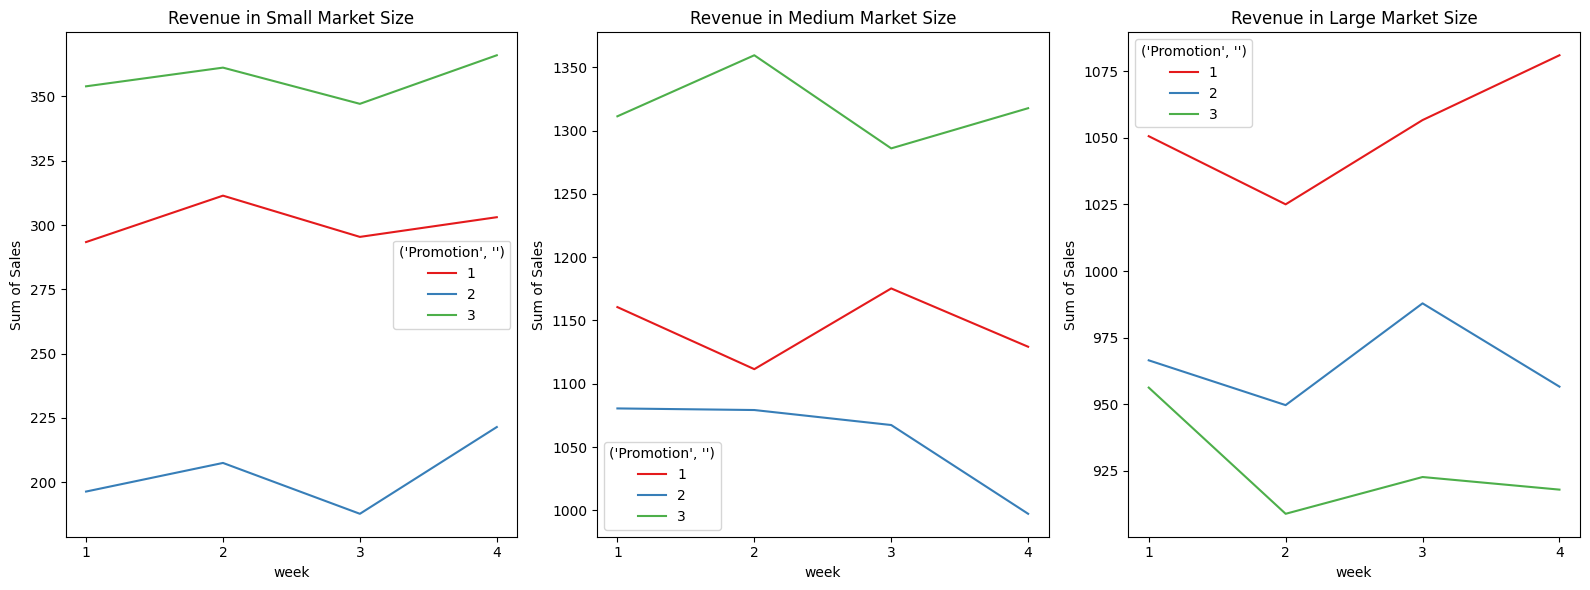

In [15]:
f, ax = plt.subplots(1,3,figsize=(16,6))
for i, label in enumerate(['Small','Medium','Large']):
    tmp2 = tmp[tmp[('MarketSize')]==label]
    sns.lineplot(x=tmp2.index, y=tmp2[('SalesInThousands','sum')], hue=tmp2[('Promotion','')], err_style=None, ax=ax[i], palette='Set1')
    ax[i].set_title(f'Revenue in {label} Market Size')
    ax[i].set_ylabel('Sum of Sales')
    ax[i].set_xticks([1,2,3,4])
plt.tight_layout()
plt.show()

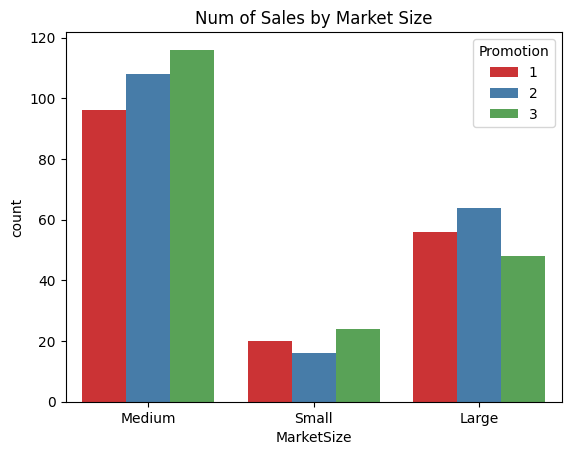

In [16]:
ax = sns.countplot(x=df.MarketSize, hue=df.Promotion, palette='Set1')
ax.set_title('Num of Sales by Market Size')
# ax.bar_label(ax.containers[0])
plt.show()

Based on Figure above, we can conclude that:
- Promotion 3 is doing well in small and medium market size
- Promotion 1 is doing well in small, medium, and achieve biggest revenue in large market size
- Promotion 2 is not doing well in small and medium market size, but in large market size it perform better than Promotion 3  

Now let's check the average of shop age in each market size by promotion group

In [17]:
tmp = df.groupby(['Promotion','MarketSize']).agg({'AgeOfStore':['count','min','mean','median','max']}).reset_index(level=1).sort_values(['MarketSize'], ascending=False)
tmp

MarketSize AgeOfStore                          
                          count min       mean median max
Promotion                                                
1              Small         20   3  11.000000    9.0  22
2              Small         16   1   9.500000    4.5  28
3              Small         24   5  11.500000    8.0  22
1             Medium         96   1   9.125000    7.5  27
2             Medium        108   1   7.481481    5.0  25
3             Medium        116   1   9.724138    8.0  24
1              Large         56   1   5.857143    3.0  24
2              Large         64   1   8.437500    7.0  23
3              Large         48   1   6.916667    4.5  19

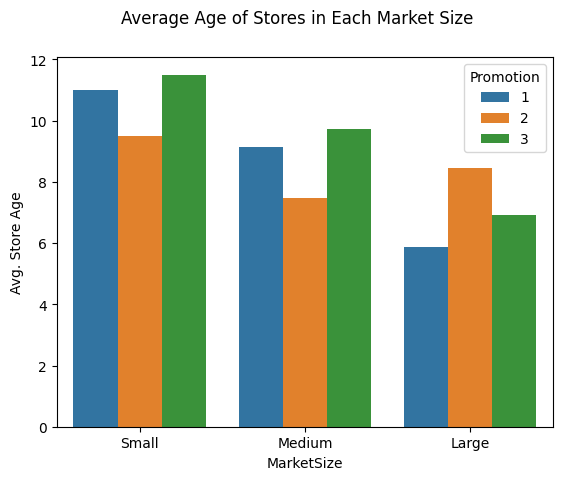

In [18]:
ax=sns.barplot(x=tmp['MarketSize'], y=tmp[('AgeOfStore','mean')], hue=tmp.index)
ax.set_ylabel('Avg. Store Age')
plt.suptitle('Average Age of Stores in Each Market Size')
plt.show()

It can be seen that:
- Most stores in the medium and small size markets that use promotion 3 have been established for more than 8 years, while those in large sizes have been established for more than 6 years
- Promotion 1 has also been implemented in older shops in medium & small sized markets just like Promotion 3, while in large markets it is mostly applied in young shops
- Promotion 2 was implemented in more younger stores compared to other promotion group in medium and small markets, but in large markets it was mostly implemented in older stores


## Statistical Hypothesis Testing

### Q1: Is data distributed normally?

In [19]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, levene
from statsmodels.stats import anova 

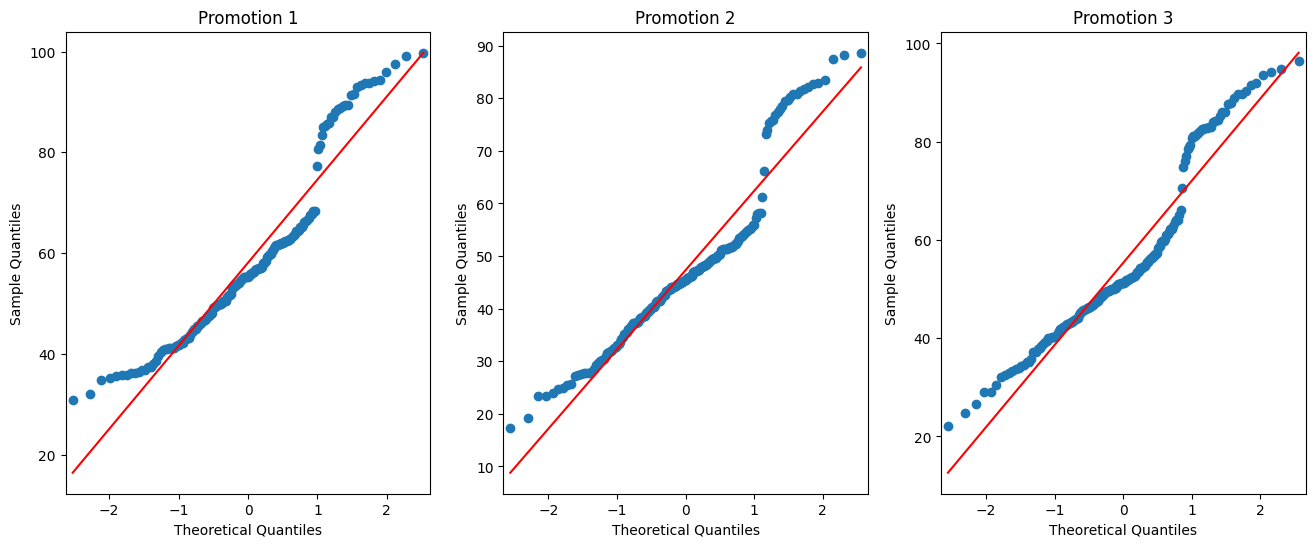

In [20]:
# check with qqplot
f, ax = plt.subplots(1,3,figsize=(16,6))

qqplot(np.array(df.loc[(df.Promotion==1), 'SalesInThousands']), line='s', ax=ax[0])
qqplot(np.array(df.loc[(df.Promotion==2), 'SalesInThousands']), line='s', ax=ax[1])
qqplot(np.array(df.loc[(df.Promotion==3), 'SalesInThousands']), line='s', ax=ax[2])
ax[0].set_title("Promotion 1")
ax[1].set_title("Promotion 2")
ax[2].set_title("Promotion 3")
plt.show()

Based on viz above, the data is not really distributed normally. Let's check with shapiro test!

In [21]:
# shapiro test to check is the data follow a normal distribution
# H0 : data follows a normal distribution
# alpha = 0.05
for label in df.Promotion.unique():
    res = shapiro(df[df.Promotion==label]['SalesInThousands'])
    print(f'Promotion {label} p-value: {res}')

Promotion 3 p-value: ShapiroResult(statistic=0.9207685589790344, pvalue=1.499518376135711e-08)
Promotion 2 p-value: ShapiroResult(statistic=0.9145088195800781, pvalue=5.456247009760773e-09)
Promotion 1 p-value: ShapiroResult(statistic=0.9152998328208923, pvalue=1.9772498305314912e-08)


Shapiro test result tell give us evidence that the data in not follow normal distribution

### Q2: Is there any significant differences between variance among groups?

In [22]:
# levene test to check is the variance in promotion is significantly different
# H0 : variance across the group are equal / no significant difference 
# alpha = 0.05
for label in df.Promotion.unique():
    stat, p_val = levene(df[df.Promotion==1]['SalesInThousands'],
                         df[df.Promotion==2]['SalesInThousands'],
                         df[df.Promotion==3]['SalesInThousands'])
print(f'Test stat {stat} p-value: {p_val}')

Test stat 1.2696787527507418 p-value: 0.2817514565692118


Levene test tell us that we fail reject H0, there is no significant difference in variance among the groups 

In [23]:
df.groupby("Promotion").agg({"SalesInThousands":["count","mean","median",'std']})

SalesInThousands                              
                     count       mean  median        std
Promotion                                               
1                      172  58.099012  55.385  16.553782
2                      188  47.329415  45.385  15.108955
3                      188  55.364468  51.165  16.766231

### Q3: Is there any significant different in SalesInThousands mean among MarketSize group?

In [24]:
!pip install pingouin
import pingouin
from statsmodels.stats.multicomp import pairwise_tukeyhsd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.9 MB/s eta 0:00:00
  Obtaining dependency information for pandas-flavor>=0.2.0 from https://files.pythonhosted.org/packages/67/1a/bfb5574b215f530c7ac5be684f33d60b299abbebd763c203aa31755f2fb2/pandas_flavor-0.6.0-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... - done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=548ede76fc119b81831d15a576dff756bba7b621aef2308c6d74b8949ee1dcb6
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [25]:
# non-parametric test with kruskal-wallis
# H0: there is no significant differences in mean of SalesInThousands among promotion group
# alpha = 0.05
pingouin.kruskal(data=df, dv='SalesInThousands', between='MarketSize')


,Source,ddof1,H,p-unc
Kruskal,MarketSize,2,256.439499,2.064764e-56


Kruskal-Wallis test result show us strong evidence that one or more of mean SalesInThousands is different than others. Which one is have significant different? We can check it with Tukey Honestly Significant Different (Tukey HSD)

In [26]:
print(pairwise_tukeyhsd(df['SalesInThousands'],df['MarketSize'], alpha=0.05))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
 Large Medium -26.1314   0.0 -28.7979 -23.4649   True
 Large  Small -12.7074   0.0 -16.9165  -8.4982   True
Medium  Small   13.424   0.0   9.4867  17.3613   True
-----------------------------------------------------


It can be seen there are statistically significant differences in the mean among all the market size groups.

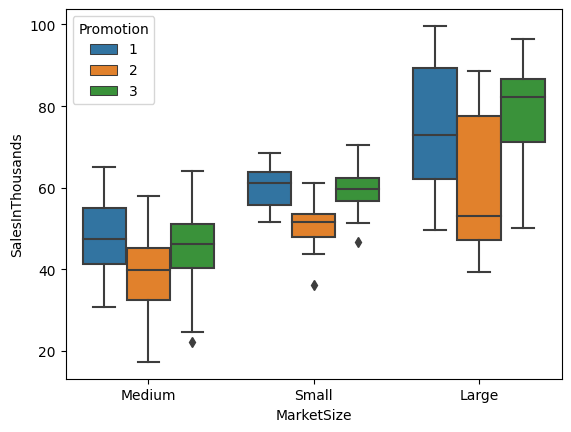

In [27]:
sns.boxplot(data=df, x='MarketSize', y='SalesInThousands', hue='Promotion')
plt.show()

### Q4: Is there any different in SalesInThousands between promotion group?

In [28]:
# non-parametric test with kruskal-wallis
# H0: there is no significant differences in mean of SalesInThousands among promotion group
# alpha = 0.05
pingouin.kruskal(data=df, dv='SalesInThousands', between='Promotion')


,Source,ddof1,H,p-unc
Kruskal,Promotion,2,53.294752,2.674187e-12


Kruskal test p-value result tell us we reject H0. It is means that among three promotion group, at least one of mean SalesInThousands is different than the others across 3 promotion group. Which one is have significant different? We can check it with Tukey HSD

In [29]:
# H0: there is no significant differences in mean between measurement A and B
# alpha = 0.05
print('############ Statsmodel tukey hsd ############')
print(pairwise_tukeyhsd(df['SalesInThousands'],df['Promotion'], alpha=0.05))
print('############ Pingouin pairwise_tukey ############')
print(pingouin.pairwise_tukey(data=df, dv='SalesInThousands', between='Promotion'))

############ Statsmodel tukey hsd ############
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------
############ Pingouin pairwise_tukey ############
   A  B    mean(A)    mean(B)       diff        se         T       p-tukey  \
0  1  2  58.099012  47.329415  10.769597  1.703839  6.320785  1.624653e-09   
1  1  3  58.099012  55.364468   2.734544  1.703839  1.604931  2.443878e-01   
2  2  3  47.329415  55.364468  -8.035053  1.665545 -4.824278  5.452136e-06   

     hedges  
0  0.679522  
1  0.163744  
2 -0.502467  


Result above tell us there is a statistically significant difference in mean of promotion 1 and 2, and 2 and 3. But not with promotion 1 and 3

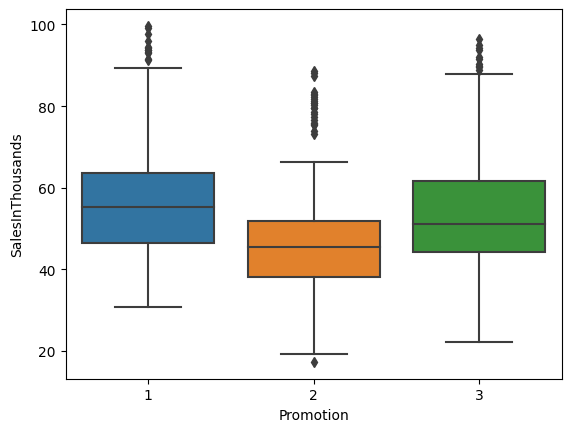

In [30]:
sns.boxplot(data=df, x='Promotion', y='SalesInThousands')
plt.show()